In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

In [6]:
import pandas as pd
import torchvision.transforms as transforms

df = pd.read_csv('/kaggle/input/mnist-in-csv/mnist_train.csv')

labels = df.iloc[:, 0].values
images = df.iloc[:, 1:].values.reshape(-1, 28, 28).astype(np.uint8)

In [7]:
print(images.shape)
print(labels.shape)

(60000, 28, 28)
(60000,)


In [8]:
from torch.utils.data import Dataset
from PIL import Image

transform = transforms.Compose([
    transforms.Lambda(lambda x: torch.tensor(x / 255.0, dtype=torch.float32).unsqueeze(0)),
    transforms.Normalize((0.5,), (0.5,))
])

class MNISTDataset(Dataset):
    def __init__(self, images, labels, transform=None):
        self.images = images
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img = self.images[idx]
        label = self.labels[idx]
        if self.transform:
            img = self.transform(img)
        return img, label

dataset = MNISTDataset(images, labels, transform=transform)
dataloader = DataLoader(dataset, batch_size=64, shuffle=True)

In [9]:
class Generator(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.LeakyReLU(0.2),
            nn.Linear(128, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, output_dim),
            nn.Tanh()
        )

    def forward(self, x):
        return self.model(x)

In [10]:
def show_generated_images(images, n=5):
    images = images.view(images.size(0), 1, 28, 28)
    grid_img = images[:n].detach().cpu().numpy()

    fig, axs = plt.subplots(1, n, figsize=(10, 2))
    for i in range(n):
        axs[i].imshow(grid_img[i][0], cmap='gray')
        axs[i].axis('off')
    plt.show()

Epoch [1/10] Loss: 0.0001
Epoch [2/10] Loss: 0.0000
Epoch [3/10] Loss: 0.0000
Epoch [4/10] Loss: 0.0000
Epoch [5/10] Loss: 0.0000


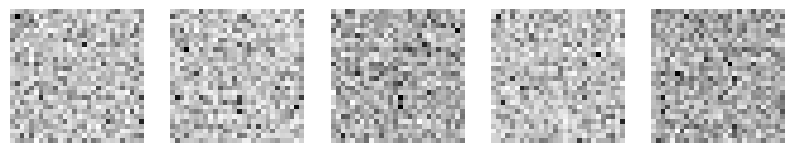

Epoch [6/10] Loss: 0.0000
Epoch [7/10] Loss: 0.0000
Epoch [8/10] Loss: 0.0000
Epoch [9/10] Loss: 0.0000
Epoch [10/10] Loss: 0.0000


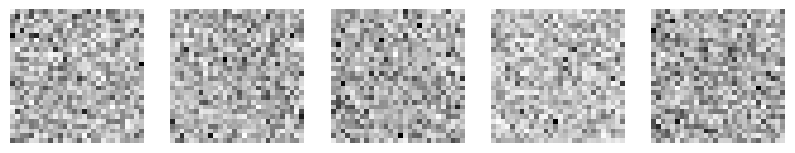

In [11]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

z_dim = 100
img_dim = 28 * 28
generator = Generator(z_dim, img_dim).to(device)

criterion = nn.MSELoss()
optimizer = optim.Adam(generator.parameters(), lr=0.0002)

epochs = 10

for epoch in range(epochs):
    for batch_idx, (real, _) in enumerate(dataloader):
        real = real.view(-1, 28 * 28).to(device)
        batch_size = real.size(0)


        noise = torch.randn(batch_size, z_dim).to(device)
        fake = generator(noise)

        target = torch.ones_like(fake).to(device)

        loss = criterion(fake, target)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f"Epoch [{epoch+1}/{epochs}] Loss: {loss.item():.4f}")

    if (epoch+1) % 5 == 0:
        show_generated_images(fake, n=5)

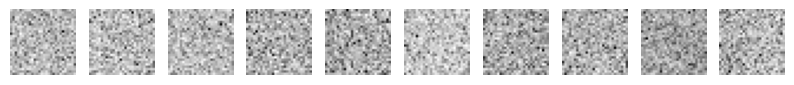

In [12]:
noise = torch.randn(10, z_dim).to(device)
generated_images = generator(noise)
show_generated_images(generated_images, n=10)

In [13]:
import os

os.makedirs("/kaggle/working/kelompok-baru/generated_images", exist_ok=True)
os.makedirs("/kaggle/working/kelompok-baru/models", exist_ok=True)

with open("/kaggle/working/kelompok-baru/README.md", "w")as f:
    f.write("# Kelompok T")

In [18]:
for epoch in range(1, 11) :
    img = Image.fromarray(np.uint8(np.random.rand(64, 64, 3) * 255))
    img.save(f"/kaggle/working/kelompok-baru/generated_images/epoch_{epoch}.png")

In [15]:
torch.save(generator, '/kaggle/working/kelompok-baru/models/full_generator.pth')

In [19]:
import shutil

shutil.make_archive(
    "kaggle/working/kelompok-baru",
    'zip',
    root_dir="/kaggle/working/",
    base_dir="kelompok-baru"
)

'/kaggle/working/kaggle/working/kelompok-baru.zip'